# Team Ernst Engel Food Demand Notebook
In this notebook, we examine a system of demands for various food products, and examine heterogeneity in household consumption.

In [1]:
import pandas as pd
import numpy as np
from cfe import Regression
import warnings

In [2]:
%run nutritional_adequacy.ipynb

In [17]:
country = 'uganda'
year_range = '2019-20'
food_nutrients, food_prices, hh_chars, expenditures, hhc_sub, fp_sub, food_cols, fp_sub_avgs = get_data(country, year_range)

In [60]:
warnings.filterwarnings("ignore")
x = expenditures
x.columns.name = 'j'
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan)

y = np.log(x.set_index(['i','t','m']))

p = food_prices
p.columns.name = 'j'

d = hhc_sub.copy()
# d.reset_index(inplace = True)
d.columns.name = 'k'
d.set_index(['i','t','m'],inplace=True)
# warnings.resetwarnings()

In [62]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [64]:
result = Regression(y = y,d = d)

<Axes: xlabel='yhat', ylabel='y'>

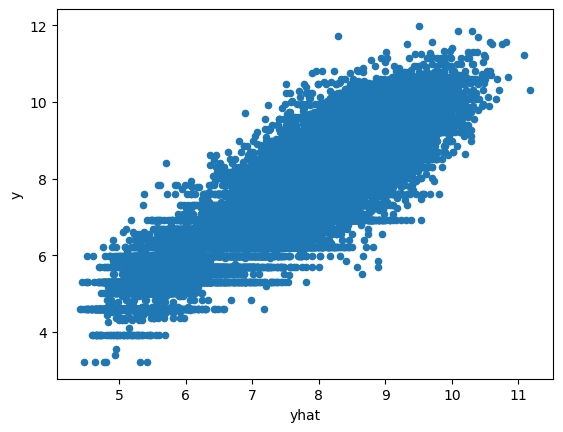

In [66]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')